# EDA Forbes Highest Paid Athletes 1990-2020

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # create wordcloud
import PIL.Image

import plotly_express as px # helps create interactive visualisations

import fuzzywuzzy # Fuzzy string matching to calculate the differences between sequences
from fuzzywuzzy import process



### 1. Load and read the data frame

In [31]:
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df # Displays the first and last 5 observations

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


### 2. Cleaning the data frame

In [32]:
df.info() # Displays data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


- Cheacking unique features discrepancies

In [33]:
df['Name'].sort_values().unique()
# It seems that there are inconsistencies with some names that need to be corrected

array(['Aaron Rodgers', 'Aaron Rogers', 'Alain Prost', 'Alex Rodriguez',
       'Andre Agassi', 'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna',
       'Buster Douglas', 'Cam Newton', 'Canelo Alvarez', 'Carson Wentz',
       'Cecil Fielder', 'Conor McGregor', 'Cristiano Ronaldo',
       'Dale Earnhardt', 'Dale Earnhardt Jr.', 'David Beckham',
       'Deion Sanders', 'Dennis Rodman', 'Donovan "Razor" Ruddock',
       'Drew Brees', 'Eli Manning', 'Emmit Smith', 'Evander Holyfield',
       'Floyd Mayweather', 'Gary Sheffield', 'George Foreman',
       'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus',
       'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier',
       'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant',
       'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant',
       'Lance Armstrong', 'LeBron James', 'Lennox Lewis',
       'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan',
       'Matthew Stafford', 'Michael 

- Creating a function to replace rows with closest match in the column

In [34]:
# function to replace rows in the provided column of the provided data frame
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 81):
   
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 81
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

- Check the names variable matches ratio

In [35]:
name = df['Name']
matches = fuzzywuzzy.process.extract("Aaron Rodgers", name, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches
matches = fuzzywuzzy.process.extract("Shaquille O'Neal", name, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[("Shaquille O'Neal", 100, 35),
 ("Shaquille O'Neal", 100, 54),
 ("Shaquille O'Neal", 100, 63),
 ("Shaquille O'Neal", 100, 76),
 ("Shaquille O'Neal", 100, 115),
 ("Shaquille O'Neal", 100, 135),
 ("Shaquille O'Neal", 100, 145),
 ("Shaquille O'Neal", 100, 157),
 ("Shaquille O'Neal", 100, 168),
 ("Shaq O'Neal", 81, 41)]

- Replace names with closest matches

In [36]:
#name = df['Name'].sort_values().unique()
'''
matches = fuzzywuzzy.process.extract('Aaron Rodgers', name, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches = fuzzywuzzy.process.extract('Shaquille O'Neal', name, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches'''
replace_matches_in_column(df=df, column='Name', string_to_match='Aaron Rodgers')

replace_matches_in_column(df=df, column='Name', string_to_match="Shaquille O'Neal")
df['Name'].sort_values().unique()

All done!
All done!


array(['Aaron Rodgers', 'Alain Prost', 'Alex Rodriguez', 'Andre Agassi',
       'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna', 'Buster Douglas',
       'Cam Newton', 'Canelo Alvarez', 'Carson Wentz', 'Cecil Fielder',
       'Conor McGregor', 'Cristiano Ronaldo', 'Dale Earnhardt',
       'Dale Earnhardt Jr.', 'David Beckham', 'Deion Sanders',
       'Dennis Rodman', 'Donovan "Razor" Ruddock', 'Drew Brees',
       'Eli Manning', 'Emmit Smith', 'Evander Holyfield',
       'Floyd Mayweather', 'Gary Sheffield', 'George Foreman',
       'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus',
       'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier',
       'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant',
       'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant',
       'Lance Armstrong', 'LeBron James', 'Lennox Lewis',
       'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan',
       'Matthew Stafford', 'Michael Jordan', 'Michae

In [37]:
df['Nationality'].sort_values().unique() # no inconsistencies found

array(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada',
       'Dominican', 'Filipino', 'Finland', 'France', 'Germany', 'Ireland',
       'Italy', 'Mexico', 'Northern Ireland', 'Philippines', 'Portugal',
       'Russia', 'Serbia', 'Spain', 'Switzerland', 'UK', 'USA'],
      dtype=object)

In [38]:
df['Sport'].sort_values().unique()


array(['American Football', 'American Football / Baseball', 'Auto Racing',
       'Auto Racing (Nascar)', 'Auto racing', 'Baseball', 'Basketball',
       'Boxing', 'F1 Motorsports', 'F1 racing', 'Golf', 'Hockey',
       'Ice Hockey', 'MMA', 'NASCAR', 'NBA', 'NFL', 'Soccer', 'Tennis',
       'auto racing', 'baseball', 'basketball', 'boxing', 'cycling',
       'golf', 'ice hockey', 'motorcycle gp', 'soccer', 'tennis'],
      dtype=object)

- Create a function to replace and group individual sport names 

In [39]:
def new_sport_name(sport):
    sport_name = {
        'NASCAR': 'Auto Racing',
        'F1 Motorsports': 'Auto Racing',
        'auto racing': 'Auto Racing',
        'Auto Racing (Nascar)': 'Auto Racing',
        'Basketball': 'NBA/Basketball',
        'basketball': 'NBA/Basketball',
        'golf': 'Golf',
        'boxing': 'Boxing',
        'American Football': 'NFL',
        'soccer': 'Soccer',
        'F1 racing': 'Auto Racing',
        'tennis': 'Tennis',
        'motorcycle gp': 'Auto Racing',
        'baseball': 'Baseball',
        'Ice Hockey': 'Hockey',
        'cycling': 'Cycling',
        'ice hockey': 'Hockey',
        'Auto racing': 'Auto Racing',
        'Boxing': 'Boxing',
        'Golf': 'Golf',
        'Soccer': 'Soccer',
        'Tennis': 'Tennis',
        'Auto Racing': 'Auto Racing',
        'NFL': 'NFL',
        'Baseball': 'Baseball',
        'American Football / Baseball': 'American Football/Baseball',
        'Hockey': 'Hockey',
        'NBA': 'NBA/Basketball',
        'MMA': 'MMA'
}
    return sport_name[sport]
df['Sport'] = df.Sport.apply(new_sport_name)
df['Sport'].value_counts()

NBA/Basketball                82
Boxing                        46
Golf                          44
Auto Racing                   40
Soccer                        33
Tennis                        23
NFL                           20
Baseball                       6
Hockey                         4
American Football/Baseball     1
Cycling                        1
MMA                            1
Name: Sport, dtype: int64

In [40]:
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

- Checking any missing values

In [41]:
df.isna().sum() # counts all missing values for each column

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

- Dropping redundant features

In [42]:
df = df.drop(['S.NO', 'Previous Year Rank'], axis=1)
df.isna().sum() # displays missing values

Name                    0
Nationality             0
Current Rank            0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

- Renaming column for a clean data frame display

In [43]:
df.rename(columns={'earnings ($ million)':'Earnings ($M)'} ,inplace=True)
df

,Name,Nationality,Current Rank,Sport,Year,Earnings ($M)
0,Mike Tyson,USA,1,Boxing,1990,28.6
1,Buster Douglas,USA,2,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,Alain Prost,France,5,Auto Racing,1990,9.0
...,...,...,...,...,...,...
296,Stephen Curry,USA,6,NBA/Basketball,2020,74.4
297,Kevin Durant,USA,7,NBA/Basketball,2020,63.9
298,Tiger Woods,USA,8,Golf,2020,62.3
299,Kirk Cousins,USA,9,NFL,2020,60.5


In [44]:
df.describe() # describe numeric values

,Current Rank,Year,Earnings ($M)
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


In [45]:
df # dispalys first and last 5 observations

,Name,Nationality,Current Rank,Sport,Year,Earnings ($M)
0,Mike Tyson,USA,1,Boxing,1990,28.6
1,Buster Douglas,USA,2,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,Alain Prost,France,5,Auto Racing,1990,9.0
...,...,...,...,...,...,...
296,Stephen Curry,USA,6,NBA/Basketball,2020,74.4
297,Kevin Durant,USA,7,NBA/Basketball,2020,63.9
298,Tiger Woods,USA,8,Golf,2020,62.3
299,Kirk Cousins,USA,9,NFL,2020,60.5


### 3. EDA and visualisation 

- Overview

In [64]:

fig = px.scatter(df,y='Sport', x='Year', size='Earnings ($M)',color='Nationality',
    title='Overall sports vs nationality by year')
fig.show()
# The scatter plot below displays an overall overview of the data set
# USA nationality seems to be the dominant in particular in sports like boxing, NBA/Basketball or golf.


- Number of players by nationality

Nationality     
USA                 206
Germany              13
UK                   13
Switzerland          12
Portugal             10
Argentina             9
Brazil                9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Filipino              1
Dominican             1
Ireland               1
Australia             1
Mexico                1
Northern Ireland      1
Russia                1
Serbia                1
Spain                 1
Austria               1
dtype: int64

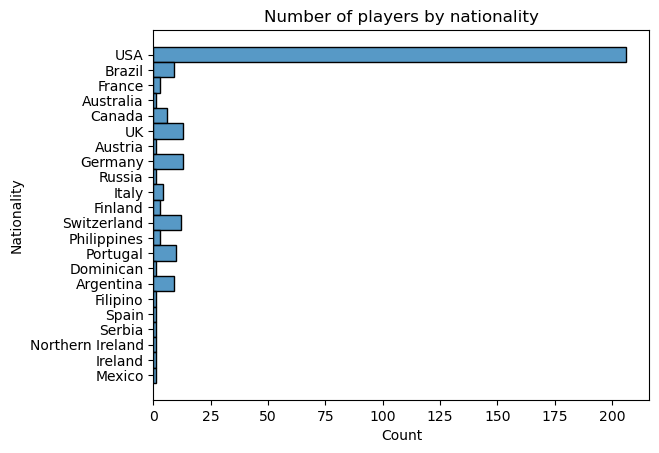

In [47]:
plt.title('Number of players by nationality')
sns.histplot(df, y='Nationality',)
df[['Nationality']].value_counts()
# There are 206 US players out of 301

- Total earnings ($M) by nationality

In [48]:
fig = px.histogram(df, y='Nationality', x='Earnings ($M)', title='Total earnings ($M) by nationality')
fig.show()
# USA is dominating with the highest cumulated earnings of nearly 9B for he period 1990-2020.

- Highest paid sport

In [49]:
fig = px.bar(df, y='Sport', x='Earnings ($M)', hover_name='Nationality', 
    color='Nationality', title='What is the highest paid sport?')
fig.show()
# NBA/Basketball accumulated the most earnings for the whole period, followed by boxing and soccer


- Each sport evolution over years by earnings

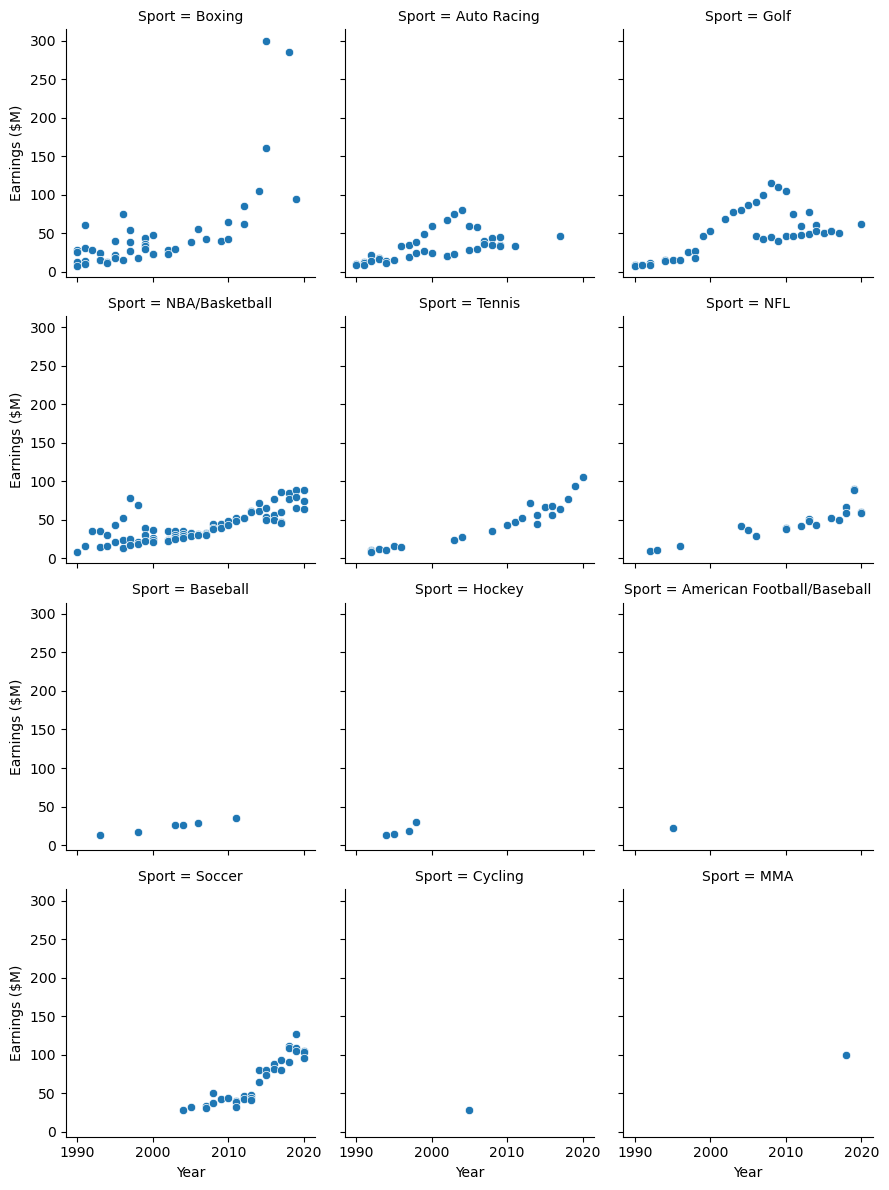

In [50]:
g = sns.FacetGrid(df, col='Sport',col_wrap=3)
g.map_dataframe(sns.scatterplot, y='Earnings ($M)', x='Year')
plt.show()
# It seems that boxing, golf and NBA/Basketball had consistent and growing year on year earnings;
# Auto racing seems to have lost popularity and decreased earnings in recent years;
# Soccer is on a fast uptrend on earnings for the past 10 years


- First ranked players by year

In [51]:
ranked_1 = df[df['Current Rank']==1].sort_values(by='Year', ascending=False)
ranked_1.style.background_gradient(cmap='Blues')
# Starting from the recent year, Roger Federer has been ranked first in 2020, and in 1990 Mike Tyson was the first ranked player

,Name,Nationality,Current Rank,Sport,Year,Earnings ($M)
291,Roger Federer,Switzerland,1,Tennis,2020,106.300000
281,Lionel Messi,Argentina,1,Soccer,2019,127.000000
271,Floyd Mayweather,USA,1,Boxing,2018,285.000000
261,Cristiano Ronaldo,Portugal,1,Soccer,2017,93.000000
251,Cristiano Ronaldo,Portugal,1,Soccer,2016,88.000000
241,Floyd Mayweather,USA,1,Boxing,2015,300.000000
231,Floyd Mayweather,USA,1,Boxing,2014,105.000000
221,Tiger Woods,USA,1,Golf,2013,78.100000
211,Floyd Mayweather,USA,1,Boxing,2012,85.000000
201,Tiger Woods,USA,1,Golf,2011,75.000000


- How many times a player ranked first 

Name                Sport         
Tiger Woods         Golf              11
Michael Jordan      NBA/Basketball     6
Floyd Mayweather    Boxing             4
Cristiano Ronaldo   Soccer             2
Michael Schumacher  Auto Racing        2
Mike Tyson          Boxing             2
Evander Holyfield   Boxing             1
Lionel Messi        Soccer             1
Roger Federer       Tennis             1
dtype: int64

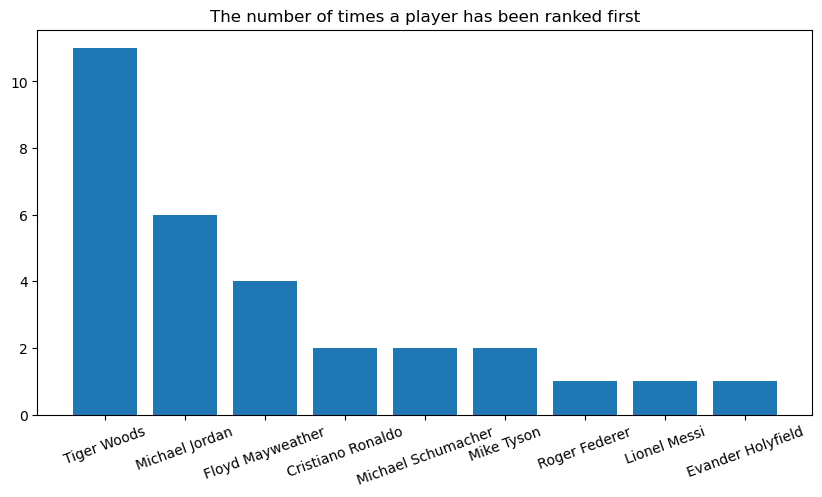

In [52]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=20)
plt.title('The number of times a player has been ranked first')
plt.bar(list(ranked_1["Name"].value_counts().keys()),list(ranked_1["Name"].value_counts()),align="center")
ranked_1[['Name', 'Sport']].value_counts()

# The golf player, Tiger Woods, has been ranked first for 11 times, more than anyone else in the given period of time

- The highest paid player by year

In [53]:
high_pay_year = df[['Year', 'Earnings ($M)', 'Name', 'Sport', 'Current Rank']].sort_values(by='Earnings ($M)',ascending=False)
high_pay_year.style.background_gradient(cmap='Blues')
# Floyd Mayweather has been the highest paid player, getting a $300M contract in 2015 for his boxing career.
# Meanwhile NBA player Michael Jordan signed the lowest paid contract from the given data set, accounted for $8.1M in 1990.

,Year,Earnings ($M),Name,Sport,Current Rank
241,2015,300.000000,Floyd Mayweather,Boxing,1
271,2018,285.000000,Floyd Mayweather,Boxing,1
242,2015,160.000000,Manny Pacquiao,Boxing,2
281,2019,127.000000,Lionel Messi,Soccer,1
171,2008,115.000000,Tiger Woods,Golf,1
272,2018,111.000000,Lionel Messi,Soccer,2
181,2009,110.000000,Tiger Woods,Golf,1
282,2019,109.000000,Cristiano Ronaldo,Soccer,2
273,2018,108.000000,Cristiano Ronaldo,Soccer,3
291,2020,106.300000,Roger Federer,Tennis,1


- All time highest paid players

In [54]:
top_earners = pd.pivot_table(df, index='Name',values='Earnings ($M)', aggfunc='sum')
top_earners = top_earners.sort_values(by="Earnings ($M)", ascending=False)
top_earners.style.background_gradient(cmap='Blues')  
# Tiger Woods is leading the board of highest paid player with a total of $1373M, meanwhile, 
# Greg Norman and Monica Seles were the lowest paid players with each getting a total of $8.5M

,Earnings ($M)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000
Cristiano Ronaldo,787.100000
Roger Federer,781.100000
Michael Jordan,738.800000
Lionel Messi,715.500000
Michael Schumacher,639.000000
Kobe Bryant,601.100000


- Gender representation

In [55]:
monica = df[df['Name']=='Monica Seles']
monica.style.background_gradient(cmap='YlGnBu')
# Monica Seles is the only woman who entered the list of top 10 highest paid players in 1992 for her tennis career

,Name,Nationality,Current Rank,Sport,Year,Earnings ($M)
29,Monica Seles,USA,10,Tennis,1992,8.500000


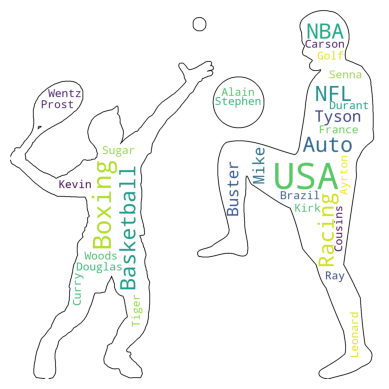

In [58]:
mask = np.array(PIL.Image.open('player.png'))
mwc = WordCloud(stopwords=set(list(STOPWORDS)+['columns','rows','x','Name', 'Nationality', 'Sport']), 
    mask=mask, background_color='white',contour_color='black',
    contour_width=3, min_font_size=3,).generate(str(df[['Sport', 'Name', 'Nationality']]))
plt.imshow(mwc)
plt.axis('off')
plt.show()

### Conclusions



- Out of 301 players, 206 are from USA;
- USA also accumulated the highest pay;
- USA seems to dominate most sports, in particular the NBA/Basketball, boxing and golf;
- NBA/Basketball is the most popular and highest paid sport;
- Auto racing seems to have lost popularity and decreased earnings in recent years;
- Soccer is on a fast uptrend by earnings for the past 10 years;
- Tiger Woods had the top accumulated earnings, $1371.8M from 1990 to 2020;
- $300M was the top contract paid to box player Floyd Mayweather in 2015;
- Basketball player Michael Jordan, together with box player Evander Holyfield and golf player Arnold Palmer had the lowest contract of $8.1M each in 1990;
- Roger Federer was ranked first in 2020;
- Women are underrepresented, with only female tennis player Monica Seles joining the list in 1992.